# Code for Exploratory analysis and Preprocessing of data

The input data was fairly clean with no null values and we were able to start with exploratory analysis with the input data as is.



In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/

# Code to go into the relevant project folder
%cd /gdrive/Shareddrives/'BA810-Team03-Project'

# Go to the link, select the google account and enter the authentication code that is generated

Mounted at /gdrive
/gdrive
/gdrive/Shareddrives/BA810-Team03-Project


In [ ]:
# importing 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
# Loading the dataset
cs = pd.read_csv('train.csv')

In [ ]:
# Setting display options to ensure rows and columns are visible as expected
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    381109 non-null  int64 
 1   Gender                381109 non-null  object
 2   Age                   381109 non-null  int64 
 3   Driving_License       381109 non-null  int64 
 4   Region_Code           381109 non-null  int64 
 5   Previously_Insured    381109 non-null  int64 
 6   Vehicle_Age           381109 non-null  object
 7   Vehicle_Damage        381109 non-null  object
 8   Annual_Premium        381109 non-null  int64 
 9   Policy_Sales_Channel  381109 non-null  int64 
 10  Vintage               381109 non-null  int64 
 11  Response              381109 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 34.9+ MB


In [ ]:
cs.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0


In [ ]:
cs.describe(include='all')

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109,381109.000000,381109.000000,381109.000000,381109.000000,381109,381109,381109.000000,381109.000000,381109.000000,381109.000000
unique,NaN,2,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,1-2 Year,Yes,NaN,NaN,NaN,NaN
freq,NaN,206089,NaN,NaN,NaN,NaN,200316,192413,NaN,NaN,NaN,NaN
mean,190555.000000,NaN,38.822584,0.997869,26.388807,0.458210,NaN,NaN,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,NaN,15.511611,0.046110,13.229888,0.498251,NaN,NaN,17213.155057,54.203995,83.671304,0.327936
min,1.000000,NaN,20.000000,0.000000,0.000000,0.000000,NaN,NaN,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,NaN,25.000000,1.000000,15.000000,0.000000,NaN,NaN,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,NaN,36.000000,1.000000,28.000000,0.000000,NaN,NaN,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,NaN,49.000000,1.000000,35.000000,1.000000,NaN,NaN,39400.000000,152.000000,227.000000,0.000000


Start of Exloratory Phase

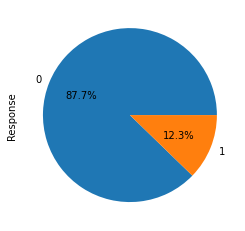

In [ ]:
# Distribution of target variable
cs.groupby('Response')['Response'].count().plot.pie(autopct="%.1f%%");

It is an imbalanced problem. We will have to use oversampling/undersampling for balancing the data.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


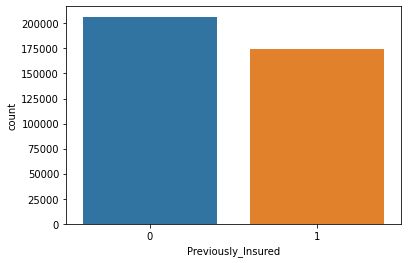

In [ ]:
# Whether the vehicle is previously insured
sns.countplot(cs.Previously_Insured)

In [ ]:
df=cs.groupby(['Previously_Insured','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()

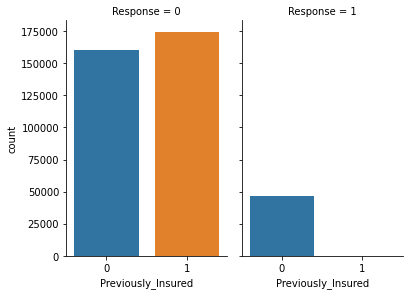

In [ ]:
# People's preference to buy insurances considered whether their cars were previously insured
sns.catplot(x="Previously_Insured", y="count",col="Response",
                data=df, kind="bar",
                height=4, aspect=.7);

Gender


In [ ]:
target = "Response"

In [ ]:
Gender_resp = pd.pivot_table(cs, index=target, columns=["Gender"], values ="id", aggfunc="count")
Gender_resp

Gender,Female,Male
Response,,
0,156835,177564
1,18185,28525


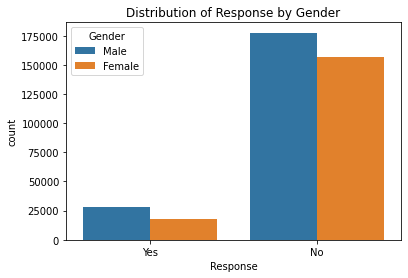

In [ ]:
# Distribution of Response by Gender
sns.countplot(data = cs, x=cs['Response'].map({1:'Yes', 0:'No'}), hue = 'Gender');
plt.title('Distribution of Response by Gender');

Overall the proportion of males is more than females in the dataset

Vehicle_Age

In [ ]:
Vehicle_Age = pd.pivot_table(cs, index=target, columns=["Vehicle_Age"], values ="id", aggfunc="count")
Vehicle_Age

Vehicle_Age,1-2 Year,< 1 Year,> 2 Years
Response,,,
0,165510,157584,11305
1,34806,7202,4702


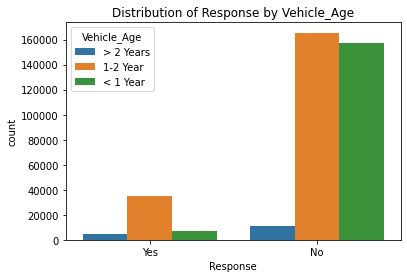

In [ ]:
# Distribution of Response by Vehicle_Age
sns.countplot(data = cs, x=cs['Response'].map({1:'Yes', 0:'No'}), hue = 'Vehicle_Age');
plt.title('Distribution of Response by Vehicle_Age');

Most people's vehicles are within 0-2 years old. People's Vehicle_Age around 1-2 year mostly prefer to  buy the vehicle insurance.

Policy_Sales_Channel

In [ ]:
Policy_Sales_Channel = pd.pivot_table(cs, index=target, columns=["Policy_Sales_Channel"], values ="id", aggfunc="count")
Policy_Sales_Channel

Policy_Sales_Channel,1,2,3,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,73,74,75,76,78,79,80,81,82,83,84,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,163
Response,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1039.0,3.0,364.0,407.0,3.0,1416.0,1390.0,152.0,214.0,1095.0,651.0,1590.0,559.0,810.0,478.0,13.0,161.0,203.0,24.0,136.0,314.0,364.0,651.0,1479.0,63809.0,2.0,2.0,737.0,1254.0,471.0,19.0,3.0,3.0,65.0,35.0,137.0,10.0,9.0,13.0,1.0,106.0,NaN,81.0,40.0,16.0,55.0,19.0,12.0,2.0,11.0,940.0,25.0,84.0,1075.0,53.0,4.0,8.0,102.0,464.0,523.0,5.0,18.0,84.0,55.0,17.0,4.0,3.0,5.0,4.0,5.0,12.0,2.0,2.0,4.0,20.0,6.0,10.0,10.0,4.0,4.0,1.0,42.0,5.0,32.0,12.0,19.0,129.0,21.0,25.0,37.0,9.0,16.0,12.0,20.0,7.0,6.0,5.0,3.0,63.0,5.0,3.0,40.0,52.0,37.0,154.0,10.0,59.0,2.0,97.0,20.0,4.0,136.0,7.0,18.0,98.0,704.0,45.0,8210.0,NaN,59999.0,899.0,5.0,102.0,124.0,41.0,20.0,107.0,58.0,81.0,10.0,92.0,145.0,8.0,112.0,130.0,100.0,1.0,1.0,151.0,16.0,150.0,69.0,1.0,236.0,3763.0,130926.0,571.0,4519.0,839.0,8364.0,4890.0,357.0,50.0,21304.0,2013.0
1,35.0,1.0,159.0,102.0,NaN,182.0,125.0,17.0,50.0,108.0,132.0,275.0,63.0,78.0,45.0,3.0,6.0,19.0,3.0,12.0,18.0,58.0,99.0,369.0,15891.0,1.0,1.0,106.0,156.0,160.0,2.0,NaN,NaN,10.0,17.0,15.0,NaN,1.0,2.0,NaN,26.0,1.0,20.0,7.0,NaN,8.0,1.0,2.0,NaN,1.0,115.0,7.0,16.0,189.0,12.0,1.0,1.0,25.0,53.0,56.0,1.0,1.0,5.0,4.0,1.0,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,3.0,NaN,4.0,4.0,NaN,NaN,NaN,6.0,2.0,2.0,2.0,7.0,29.0,3.0,3.0,9.0,NaN,NaN,1.0,1.0,NaN,2.0,2.0,NaN,9.0,NaN,NaN,12.0,2.0,1.0,21.0,1.0,9.0,NaN,7.0,3.0,NaN,18.0,NaN,NaN,5.0,65.0,19.0,1720.0,1.0,13996.0,127.0,NaN,8.0,13.0,3.0,2.0,14.0,4.0,4.0,NaN,9.0,40.0,NaN,12.0,13.0,7.0,NaN,NaN,23.0,NaN,34.0,8.0,NaN,76.0,122.0,3858.0,36.0,1474.0,395.0,2297.0,1794.0,135.0,1.0,475.0,880.0


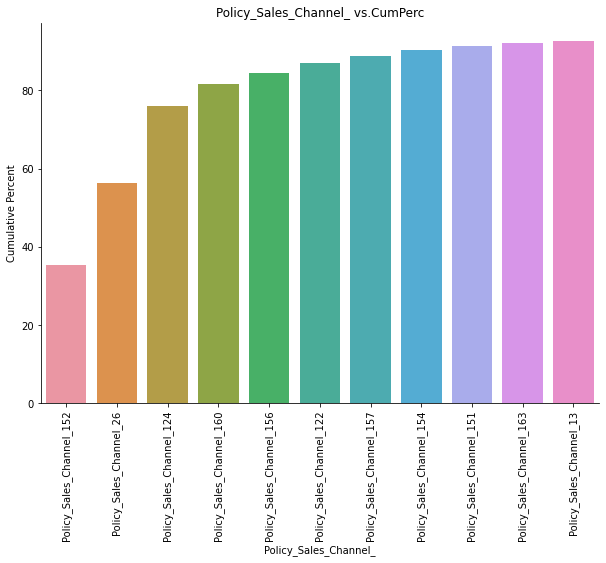

In [ ]:
policy_cols = list(filter(lambda x: x.startswith('Policy_Sales_Channel'), cs_dum.columns))
x = cs_dum[policy_cols].sum().sort_values(ascending=False).to_frame()
x.columns = ['Count']
x.reset_index(inplace=True)
x['Percent'] = round(x['Count'] *100 / x['Count'].sum(),2)
x['CumPerc'] = np.cumsum(x['Percent'])
x_final = x.head(11)
plt.figure(figsize=(10,7))
plt.title('Policy_Sales_Channel_ vs.CumPerc')
sns.barplot(data=x_final,x='index', y='CumPerc')
plt.xlabel('Policy_Sales_Channel_')
plt.ylabel('Cumulative Percent')
plt.xticks(rotation=90)
sns.despine()


From the graph, we can see that the top 9 channels hold the cumulative perecentage above 90%,which means that in later study, we can just put channels other than top 10 into one group.(To decrease variables and more convincent).

Vintage

In [ ]:
Vintage_Resp = pd.pivot_table(cs, index=target, columns=["Vintage"], values ="id", aggfunc="count")
Vintage_Resp

Vintage,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
Response,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1164,1153,1092,1145,1104,1146,1141,1130,1098,1075,1143,1163,1169,1171,1199,1159,1128,1224,1172,1159,1187,1208,1072,1180,1176,1168,1151,1195,1144,1156,1171,1136,1195,1138,1156,1114,1139,1164,1102,1161,1100,1134,1143,1153,1195,1130,1183,1134,1138,1139,1120,1133,1147,1210,1155,1203,1144,1136,1139,1172,1167,1184,1113,1240,1221,1143,1194,1196,1177,1156,1228,1153,1103,1188,1162,1109,1144,1141,1165,1089,1193,1182,1201,1096,1205,1189,1145,1122,1155,1164,1156,1123,1183,1240,1098,1174,1179,1151,1125,1166,1192,1166,1126,1194,1155,1179,1141,1212,1091,1153,1139,1143,1181,1158,1176,1137,1230,1114,1150,1154,1212,1205,1130,1119,1118,1164,1164,1104,1129,1129,1175,1157,1169,1119,1173,1153,1138,1198,1134,1131,1153,1172,1137,1129,1119,1157,1157,1150,1222,1153,1220,1162,1165,1138,1089,1172,1144,1121,1126,1130,1130,1117,1175,1196,1167,1126,1113,1155,1118,1158,1122,1081,1157,1106,1128,1180,1166,1223,1129,1156,1159,1220,1145,1187,1173,1192,1130,1208,1130,1134,1183,1152,1126,1131,1148,1084,1145,1137,1132,1117,1105,1158,1086,1151,1124,1199,1183,1160,1176,1202,1083,1151,1194,1122,1072,1096,1230,1175,1207,1120,1196,1122,1216,1160,1142,1092,1146,1093,1159,1116,1134,1184,1159,1173,1115,1244,1135,1129,1197,1205,1202,1186,1117,1189,1197,1163,1233,1183,1127,1148,1118,1142,1141,1200,1097,1125,1126,1169,1164,1134,1170,1131,1174,1192,1117,1144,1122,1074,1166,1098,1167,1147,1207,1160,1209,1113,1117,1122,1175,1107,1112,1154,1203,1166,1122,1118,1146,1142,1198,1114
1,147,191,165,184,156,149,174,144,148,171,171,167,157,156,180,146,165,158,156,163,156,180,158,159,190,152,169,178,158,171,172,146,177,161,173,175,170,147,145,179,145,160,163,159,183,152,174,176,162,165,159,144,151,165,179,176,143,135,169,165,159,158,150,170,147,162,171,162,140,172,136,160,167,171,192,174,152,156,142,145,159,143,161,161,146,153,158,140,164,148,172,167,169,143,149,167,161,168,137,151,170,143,158,163,170,164,176,154,159,160,169,160,145,176,160,171,156,162,184,152,164,182,155,173,163,175,160,156,169,149,144,162,166,171,183,160,178,152,164,160,170,174,174,152,162,163,137,172,172,139,168,142,133,162,177,189,150,176,146,169,150,155,147,152,137,156,143,168,158,154,163,162,159,171,157,155,174,169,156,190,148,163,156,162,174,168,147,167,168,160,172,150,181,157,166,151,156,163,173,180,174,167,182,165,151,183,156,150,151,154,186,151,157,186,155,160,158,167,157,159,146,152,170,163,164,155,147,162,165,151,180,174,180,148,175,143,165,142,164,165,155,157,159,148,146,144,185,165,172,163,158,153,138,164,150,146,153,155,174,148,178,163,164,135,161,154,158,152,157,158,170,160,190,146,158,150,160,150,170,172,157,151,160,159,159,157,156,142,186,169


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


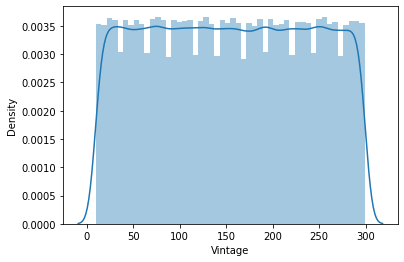

In [ ]:
# Distribution of Vintage
sns.distplot(a=cs['Vintage'], kde=True)

The Vintage i.e. the number of days the customer has been associated with the company is almost equally distributed. Thus almost all the customers have been with the company for almost same time.

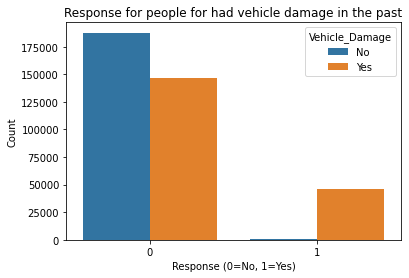

In [ ]:
# Response for people who had vehicle damage in the past
damage_count = cs.groupby(['Vehicle_Damage','Response'])['Response'].count().to_frame()
damage_count.columns = ['Count']
damage_count.reset_index(inplace = True)
sns.barplot(y='Count',x='Response',data=damage_count,hue='Vehicle_Damage').set_xlabel('Response (0=No, 1=Yes)')
plt.title("Response for people for had vehicle damage in the past");

Inference: Nearly all the customers who are interested in Vehicle insurance had Vehicle damage in the past.

In [ ]:
pd.pivot_table(index="Response", columns="Vehicle_Damage",data=cs,values="id",aggfunc="count")

Vehicle_Damage,No,Yes
Response,,
0,187714,146685
1,982,45728


Text(0.5, 1.0, "Distribution of the age for people whose Response is 'Yes'")

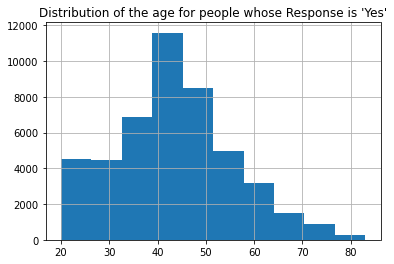

In [ ]:
# The distribution of the age for people who show interest in purchasing vehicle insurance
age_count = cs[["Age","Response"]]
age_response = age_count[age_count["Response"]==1]
df_age = age_response.reset_index()
df_age.hist(['Age'])
plt.title("Distribution of the age for people whose Response is 'Yes'")

Inference: This shows the range of age for those who are interested in Vehicle insurance, which is around 40 years old.

In [ ]:
pd.pivot_table(cs,index='Response',values='Age')

,Age
Response,
0,38.178227
1,43.435560


In [ ]:
# Copy data
vehicle_data=cs.copy()

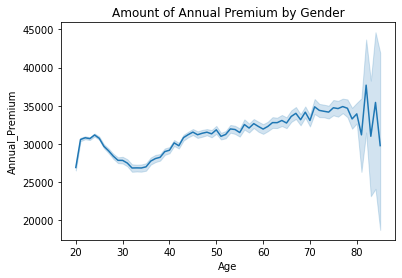

In [ ]:
# Amount of Annual Premium by Gender
age_only_plot=sns.lineplot(x='Age', y='Annual_Premium', data=vehicle_data)
plt.title('Amount of Annual Premium by Gender');

The amount of annual premium varies dramatically on 80+ age population.

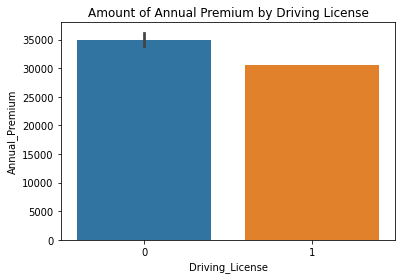

In [ ]:
# Amount of Annual Premium by Driving License
driving_license_plot=sns.barplot(x='Driving_License', y='Annual_Premium', data= vehicle_data)
plt.title('Amount of Annual Premium by Driving License');

Driving license decreases the mean and variance of annual premium.

In [ ]:
# Region data
highest_region_code_data=vehicle_data.groupby('Region_Code').mean().sort_values('Annual_Premium', ascending=False).reset_index()[0:20]
lowest_region_code_data=vehicle_data.groupby('Region_Code').mean().sort_values('Annual_Premium', ascending=True).reset_index()[0:20]

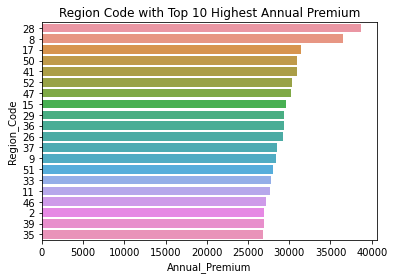

In [ ]:
# Region Code with Top 10 Highest Annual Premium
region_top_plot=sns.barplot(x='Annual_Premium', y='Region_Code', 
                            data=highest_region_code_data, 
                             orient='h', order=highest_region_code_data.sort_values('Annual_Premium', ascending=False).Region_Code
                            ,)
plt.title('Region Code with Top 10 Highest Annual Premium');

Region 28 customers are expected to pay the most in a year.

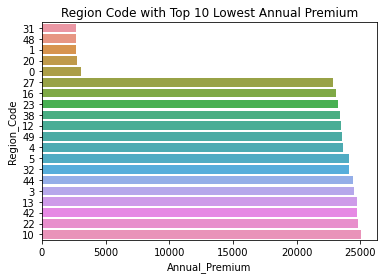

In [ ]:
# Region Code with Top 10 Lowest Annual Premium
region_top_plot=sns.barplot(x='Annual_Premium', y='Region_Code', 
                            data=lowest_region_code_data, 
                             orient='h', order=lowest_region_code_data.sort_values('Annual_Premium', ascending=True).Region_Code
                            ,)
plt.title('Region Code with Top 10 Lowest Annual Premium');

Region 31 customers are expected to pay the least in a year.

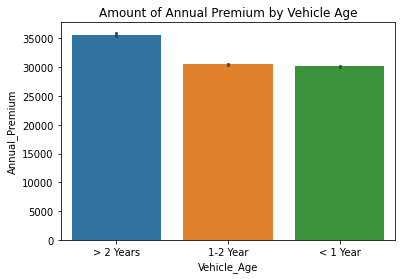

In [ ]:
# Amount of Annual Premium by Vehicle Age
vehicle_age_plot=sns.barplot(x='Vehicle_Age', y='Annual_Premium', data=vehicle_data)
plt.title("Amount of Annual Premium by Vehicle Age");

Annual payment soars as vehicle age reaches 2 years.

In [ ]:
# Policy sales channel data
top_vehicle_channel_data=vehicle_data.groupby('Policy_Sales_Channel').mean().reset_index().sort_values(by='Annual_Premium', ascending=False)[0:20]
low_vehicle_channel_data=vehicle_data.groupby('Policy_Sales_Channel').mean().reset_index().sort_values(by='Annual_Premium', ascending=True)[0:20]

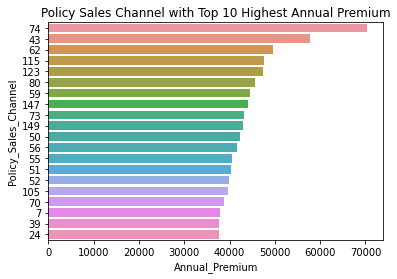

In [ ]:
# Policy Sales Channel with Top 10 Highest Annual Premium
vintage_top_plot=sns.barplot(x='Annual_Premium', y='Policy_Sales_Channel', data=top_vehicle_channel_data, 
                             orient='h', order=top_vehicle_channel_data.sort_values('Annual_Premium', ascending=False).Policy_Sales_Channel
                            )
plt.title('Policy Sales Channel with Top 10 Highest Annual Premium');

Policy sales channel 74 leads the price of premium payment.

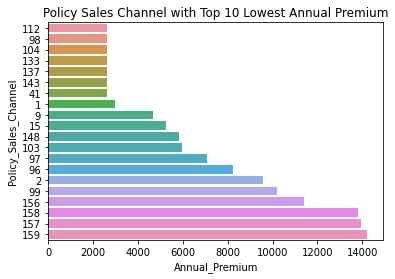

In [ ]:
# Policy Sales Channel with Top 10 Lowest Annual Premium
vintage_top_plot=sns.barplot(x='Annual_Premium', y='Policy_Sales_Channel', data=low_vehicle_channel_data, 
                             orient='h', order=low_vehicle_channel_data.sort_values('Annual_Premium', ascending=True).Policy_Sales_Channel
                            )
plt.title('Policy Sales Channel with Top 10 Lowest Annual Premium');

Policy sales channel 112 has the lowest price of premium payment.

In [ ]:
# Computing data for graphs realted to Driving License
dl = cs.groupby(['Driving_License','Response'])['Response'].count().to_frame()
dl.columns = ['Count']
dl.reset_index(inplace = True)
dln = dl.iloc[0:2,]
dly = dl.iloc[2:,]

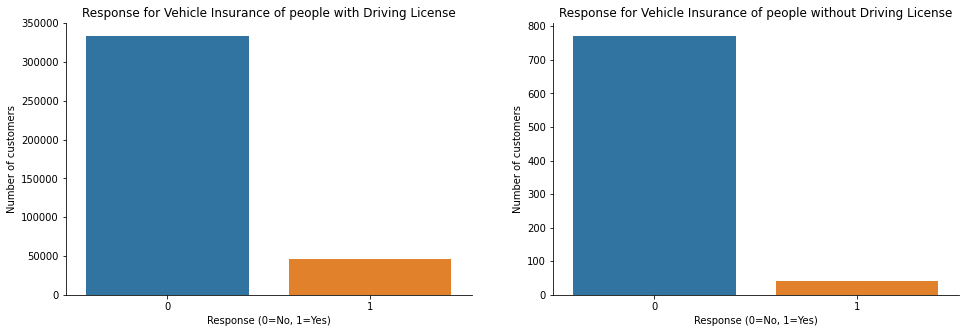

In [ ]:
# Graph for Driving license across the dataset
f, axes = plt.subplots(1, 2, figsize=(16, 5))

axes[0].set_title('Response for Vehicle Insurance of people with Driving License')
sns.barplot(x='Response', y='Count', data=dly, ax=axes[0])
axes[0].set_xlabel('Response (0=No, 1=Yes)')
axes[0].set_ylabel('Number of customers')

axes[1].set_title('Response for Vehicle Insurance of people without Driving License')
sns.barplot(x='Response', y='Count', data=dln, ax=axes[1])
axes[1].set_xlabel('Response (0=No, 1=Yes)')
axes[1].set_ylabel('Number of customers')

sns.despine()

In [ ]:
dl['Percent'] = round(dl['Count'] *100 / dl['Count'].sum(),2)
dl

,Driving_License,Response,Count,Percent
0,0,0,771,0.20
1,0,1,41,0.01
2,1,0,333628,87.54
3,1,1,46669,12.25


Inference:

*   Almost all (99.79%) of the existing Health Insurance cusotmer have driving licesnce and of these around 12% are interested in getting a Health Insurance
*   It is interesting to note that of the customers who reported that they do not have a Driving License, 5% of these were interested in Vehicle insurance.



Text(0.5, 1.0, 'Amount of Annual Premium by Driving License')

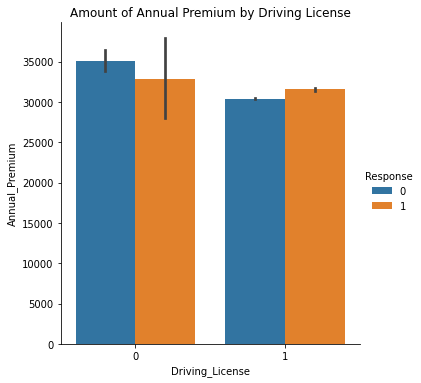

In [28]:
# Amount of Annual Premium by Driving License
sns.catplot(x="Driving_License", y="Annual_Premium", hue="Response", kind='bar', data=cs);
plt.title('Amount of Annual Premium by Driving License')

Inference: Annual premium in customers with a driving license is lower than those without a driving license.

In [14]:
# Preparing data for Region Code related graph
rc = pd.DataFrame(cs.groupby(['Region_Code', 'Response'])['Region_Code'].count())
rc.columns = ['Count']
rc.reset_index(inplace=True)

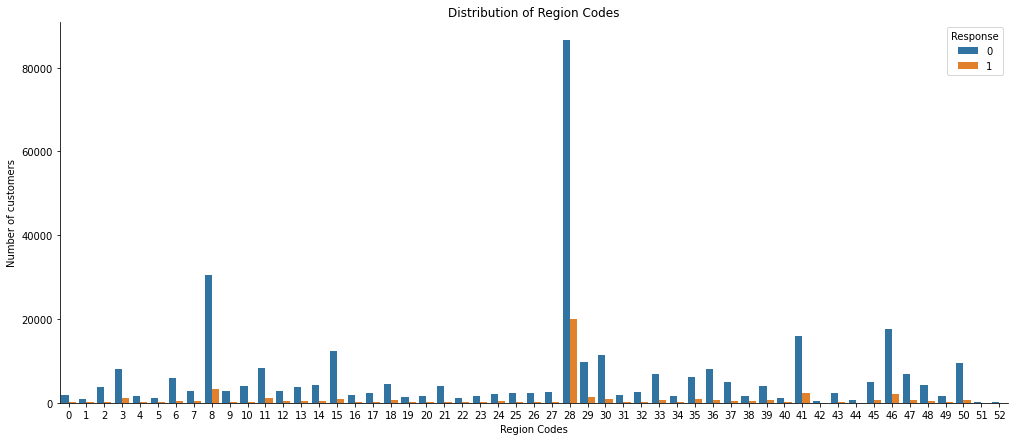

In [ ]:
# Graph of Region Code across the dataset
plt.figure(figsize=(17,7))
plt.title('Distribution of Region Codes')
sns.barplot(x='Region_Code', y='Count', hue='Response', data=rc)
plt.xlabel('Region Codes')
plt.ylabel('Number of customers')
sns.despine()

In [15]:
rc['Percent'] = round(rc['Count'] *100 / rc['Count'].sum(),2)
rc.sort_values(by='Count', ascending=False, inplace=True)
rc.head()

,Region_Code,Response,Count,Percent
56,28,0,86498,22.70
16,8,0,30620,8.03
57,28,1,19917,5.23
92,46,0,17717,4.65
82,41,0,16039,4.21


Inference:

*   The graph shows that majority of the customers (28%) are from region code 28, followed by 8 (9%), 46 (5%) and 41 (5%)
*   The positive response to interest in Vehicle Insurance follows similar trend with majority from 28 (43%) followed by 8 (7%), 41 (5%) and 46 (4%)



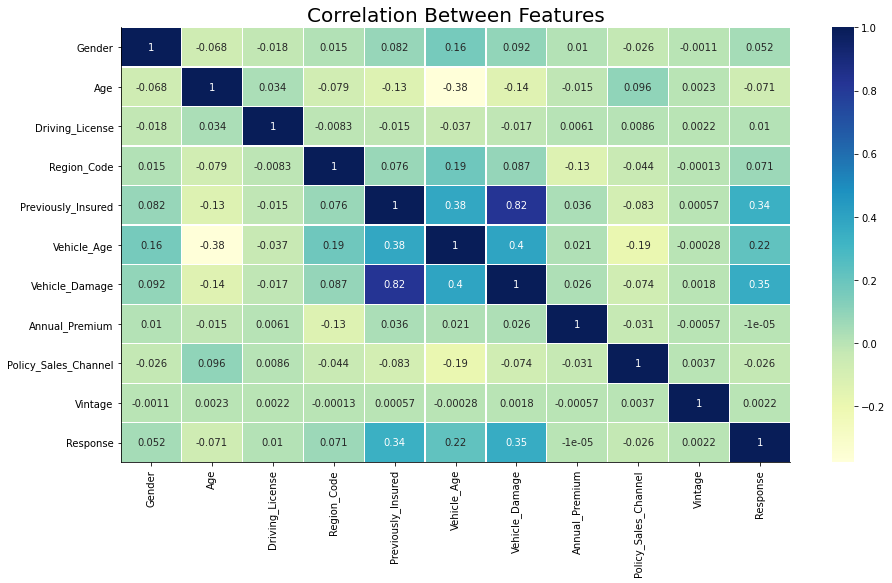

In [ ]:
# Correlation plot
plt.figure(figsize=(15, 8))
cs_corr = cs.drop('id', axis=1)
corr = cs_corr.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.2, cmap="YlGnBu", annot=True)
plt.title('Correlation Between Features', fontsize=20)
sns.despine();

Vehicle_Damage and Previously_Insured varibles are highly correlated with correlation = 0.82
This indicates that people who have faced damage to their vehicle tend to get vehicle insurance which is an expected behavior.


# Profiling our customers

In [ ]:
# Loading the dataset
dd = pd.read_csv('train.csv')

In [ ]:
dd.set_index('id', drop=True, inplace=True)
categorical_vars = ["Gender", "Driving_License", "Region_Code", "Previously_Insured", "Vehicle_Age", "Vehicle_Damage", "Response", "Policy_Sales_Channel"]
for c in categorical_vars:
  dd[c] = dd[c].astype('category')
dd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381109 entries, 1 to 381109
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   Gender                381109 non-null  category
 1   Age                   381109 non-null  int64   
 2   Driving_License       381109 non-null  category
 3   Region_Code           381109 non-null  category
 4   Previously_Insured    381109 non-null  category
 5   Vehicle_Age           381109 non-null  category
 6   Vehicle_Damage        381109 non-null  category
 7   Annual_Premium        381109 non-null  int64   
 8   Policy_Sales_Channel  381109 non-null  category
 9   Vintage               381109 non-null  int64   
 10  Response              381109 non-null  category
dtypes: category(8), int64(3)
memory usage: 14.9 MB


In [ ]:
dd_1 = dd[dd['Response'] == 1].copy()
# dd_1.reset_index(inplace=True, drop = True)
print(dd_1.shape)
dd_1.head()

(46710, 11)


,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
8,Female,56,1,28,0,1-2 Year,Yes,32031,26,72,1
11,Female,47,1,35,0,1-2 Year,Yes,47576,124,46,1
16,Male,37,1,6,0,1-2 Year,Yes,2630,156,147,1


In [ ]:
dd_0 = dd[dd['Response'] == 0].copy()
# dd_0.reset_index(inplace=True, drop = True)
print(dd_0.shape)
dd_0.head()

(334399, 11)


,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0
6,Female,24,1,33,0,< 1 Year,Yes,2630,160,176,0
7,Male,23,1,11,0,< 1 Year,Yes,23367,152,249,0


In [ ]:
dd_0.describe(include='all')

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,334399,334399.000000,334399.0,334399.0,334399.0,334399,334399,334399.000000,334399.0,334399.000000,334399.0
unique,2,NaN,2.0,53.0,2.0,3,2,NaN,153.0,NaN,1.0
top,Male,NaN,1.0,28.0,1.0,1-2 Year,No,NaN,152.0,NaN,0.0
freq,177564,NaN,333628.0,86498.0,174470.0,165510,187714,NaN,130926.0,NaN,334399.0
mean,NaN,38.178227,NaN,NaN,NaN,NaN,NaN,30419.160276,NaN,154.380243,NaN
std,NaN,15.816052,NaN,NaN,NaN,NaN,NaN,16998.293197,NaN,83.661975,NaN
min,NaN,20.000000,NaN,NaN,NaN,NaN,NaN,2630.000000,NaN,10.000000,NaN
25%,NaN,24.000000,NaN,NaN,NaN,NaN,NaN,24351.000000,NaN,82.000000,NaN
50%,NaN,34.000000,NaN,NaN,NaN,NaN,NaN,31504.000000,NaN,154.000000,NaN
75%,NaN,49.000000,NaN,NaN,NaN,NaN,NaN,39120.000000,NaN,227.000000,NaN


In [ ]:
dd_1.describe(include='all')

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,46710,46710.000000,46710.0,46710.0,46710.0,46710,46710,46710.000000,46710.0,46710.000000,46710.0
unique,2,NaN,2.0,53.0,2.0,3,2,NaN,121.0,NaN,1.0
top,Male,NaN,1.0,28.0,0.0,1-2 Year,Yes,NaN,26.0,NaN,1.0
freq,28525,NaN,46669.0,19917.0,46552.0,34806,45728,NaN,15891.0,NaN,46710.0
mean,NaN,43.435560,NaN,NaN,NaN,NaN,NaN,31604.092742,NaN,154.112246,NaN
std,NaN,12.168924,NaN,NaN,NaN,NaN,NaN,18646.508040,NaN,83.738574,NaN
min,NaN,20.000000,NaN,NaN,NaN,NaN,NaN,2630.000000,NaN,10.000000,NaN
25%,NaN,35.000000,NaN,NaN,NaN,NaN,NaN,24868.000000,NaN,82.000000,NaN
50%,NaN,43.000000,NaN,NaN,NaN,NaN,NaN,33002.000000,NaN,154.000000,NaN
75%,NaN,51.000000,NaN,NaN,NaN,NaN,NaN,41297.000000,NaN,226.000000,NaN


# End of Exloratory Phase

# Preparing the dataset for modelling

In [17]:
# Loading the data again
# Loading the dataset
cs = pd.read_csv('train.csv')
cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    381109 non-null  int64 
 1   Gender                381109 non-null  object
 2   Age                   381109 non-null  int64 
 3   Driving_License       381109 non-null  int64 
 4   Region_Code           381109 non-null  int64 
 5   Previously_Insured    381109 non-null  int64 
 6   Vehicle_Age           381109 non-null  object
 7   Vehicle_Damage        381109 non-null  object
 8   Annual_Premium        381109 non-null  int64 
 9   Policy_Sales_Channel  381109 non-null  int64 
 10  Vintage               381109 non-null  int64 
 11  Response              381109 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 34.9+ MB


In [18]:
cs.drop('id', axis=1, inplace=True)
cs.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,Female,29,1,41,1,< 1 Year,No,27496,152,39,0


In [19]:
cs_dum = pd.get_dummies(cs, columns=['Gender', 'Driving_License', 'Region_Code', \
                                     'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel'], \
                        drop_first = True)
cs_dum.head()

,Age,Annual_Premium,Vintage,Response,Gender_Male,Driving_License_1,Region_Code_1,Region_Code_2,Region_Code_3,Region_Code_4,Region_Code_5,Region_Code_6,Region_Code_7,Region_Code_8,Region_Code_9,Region_Code_10,Region_Code_11,Region_Code_12,Region_Code_13,Region_Code_14,Region_Code_15,Region_Code_16,Region_Code_17,Region_Code_18,Region_Code_19,Region_Code_20,Region_Code_21,Region_Code_22,Region_Code_23,Region_Code_24,Region_Code_25,Region_Code_26,Region_Code_27,Region_Code_28,Region_Code_29,Region_Code_30,Region_Code_31,Region_Code_32,Region_Code_33,Region_Code_34,Region_Code_35,Region_Code_36,Region_Code_37,Region_Code_38,Region_Code_39,Region_Code_40,Region_Code_41,Region_Code_42,Region_Code_43,Region_Code_44,Region_Code_45,Region_Code_46,Region_Code_47,Region_Code_48,Region_Code_49,Region_Code_50,Region_Code_51,Region_Code_52,Previously_Insured_1,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes,Policy_Sales_Channel_2,Policy_Sales_Channel_3,Policy_Sales_Channel_4,Policy_Sales_Channel_6,Policy_Sales_Channel_7,Policy_Sales_Channel_8,Policy_Sales_Channel_9,Policy_Sales_Channel_10,Policy_Sales_Channel_11,Policy_Sales_Channel_12,Policy_Sales_Channel_13,Policy_Sales_Channel_14,Policy_Sales_Channel_15,Policy_Sales_Channel_16,Policy_Sales_Channel_17,Policy_Sales_Channel_18,Policy_Sales_Channel_19,Policy_Sales_Channel_20,Policy_Sales_Channel_21,Policy_Sales_Channel_22,Policy_Sales_Channel_23,Policy_Sales_Channel_24,Policy_Sales_Channel_25,Policy_Sales_Channel_26,Policy_Sales_Channel_27,Policy_Sales_Channel_28,Policy_Sales_Channel_29,Policy_Sales_Channel_30,Policy_Sales_Channel_31,Policy_Sales_Channel_32,Policy_Sales_Channel_33,Policy_Sales_Channel_34,Policy_Sales_Channel_35,Policy_Sales_Channel_36,Policy_Sales_Channel_37,Policy_Sales_Channel_38,Policy_Sales_Channel_39,Policy_Sales_Channel_40,Policy_Sales_Channel_41,Policy_Sales_Channel_42,Policy_Sales_Channel_43,Policy_Sales_Channel_44,Policy_Sales_Channel_45,Policy_Sales_Channel_46,Policy_Sales_Channel_47,Policy_Sales_Channel_48,Policy_Sales_Channel_49,Policy_Sales_Channel_50,Policy_Sales_Channel_51,Policy_Sales_Channel_52,Policy_Sales_Channel_53,Policy_Sales_Channel_54,Policy_Sales_Channel_55,Policy_Sales_Channel_56,Policy_Sales_Channel_57,Policy_Sales_Channel_58,Policy_Sales_Channel_59,Policy_Sales_Channel_60,Policy_Sales_Channel_61,Policy_Sales_Channel_62,Policy_Sales_Channel_63,Policy_Sales_Channel_64,Policy_Sales_Channel_65,Policy_Sales_Channel_66,Policy_Sales_Channel_67,Policy_Sales_Channel_68,Policy_Sales_Channel_69,Policy_Sales_Channel_70,Policy_Sales_Channel_71,Policy_Sales_Channel_73,Policy_Sales_Channel_74,Policy_Sales_Channel_75,Policy_Sales_Channel_76,Policy_Sales_Channel_78,Policy_Sales_Channel_79,Policy_Sales_Channel_80,Policy_Sales_Channel_81,Policy_Sales_Channel_82,Policy_Sales_Channel_83,Policy_Sales_Channel_84,Policy_Sales_Channel_86,Policy_Sales_Channel_87,Policy_Sales_Channel_88,Policy_Sales_Channel_89,Policy_Sales_Channel_90,Policy_Sales_Channel_91,Policy_Sales_Channel_92,Policy_Sales_Channel_93,Policy_Sales_Channel_94,Policy_Sales_Channel_95,Policy_Sales_Channel_96,Policy_Sales_Channel_97,Policy_Sales_Channel_98,Policy_Sales_Channel_99,Policy_Sales_Channel_100,Policy_Sales_Channel_101,Policy_Sales_Channel_102,Policy_Sales_Channel_103,Policy_Sales_Channel_104,Policy_Sales_Channel_105,Policy_Sales_Channel_106,Policy_Sales_Channel_107,Policy_Sales_Channel_108,Policy_Sales_Channel_109,Policy_Sales_Channel_110,Policy_Sales_Channel_111,Policy_Sales_Channel_112,Policy_Sales_Channel_113,Policy_Sales_Channel_114,Policy_Sales_Channel_115,Policy_Sales_Channel_116,Policy_Sales_Channel_117,Policy_Sales_Channel_118,Policy_Sales_Channel_119,Policy_Sales_Channel_120,Policy_Sales_Channel_121,Policy_Sales_Channel_122,Policy_Sales_Channel_123,Policy_Sales_Channel_124,Policy_Sales_Channel_125,Policy_Sales_Channel_126,Policy_Sales_Channel_127,Policy_Sales_Channel_128,Policy_Sales_Channel_129,Policy_Sales_Channel_130,Policy_Sales_Channel_131,Policy_Sales_Channel_132,Polic

In [20]:
cs_dum.shape

(381109, 216)

In [21]:
# Reducing cols of the Policy_Sales_Channel variable
policy_cols = list(filter(lambda x: x.startswith('Policy_Sales_Channel'), cs_dum.columns))
x = cs_dum[policy_cols].sum().sort_values(ascending=False).to_frame()
x.columns = ['Count']
x.reset_index(inplace=True)
x['Percent'] = round(x['Count'] *100 / x['Count'].sum(),2)
x['CumPerc'] = np.cumsum(x['Percent'])
x.head(20)

,index,Count,Percent,CumPerc
0,Policy_Sales_Channel_152,134784,35.47,35.47
1,Policy_Sales_Channel_26,79700,20.97,56.44
2,Policy_Sales_Channel_124,73995,19.47,75.91
3,Policy_Sales_Channel_160,21779,5.73,81.64
4,Policy_Sales_Channel_156,10661,2.81,84.45
5,Policy_Sales_Channel_122,9930,2.61,87.06
6,Policy_Sales_Channel_157,6684,1.76,88.82
7,Policy_Sales_Channel_154,5993,1.58,90.40
8,Policy_Sales_Channel_151,3885,1.02,91.42
9,Policy_Sales_Channel_163,2893,0.76,92.18


In [22]:
# We see tht top 17 rows contribute to 95% of the data. Thus we will retain these 17 columns and combine others in one 'Others' column
policy_cols_to_combine = list(x.iloc[17:,0])
print(policy_cols_to_combine)

['Policy_Sales_Channel_11', 'Policy_Sales_Channel_52', 'Policy_Sales_Channel_125', 'Policy_Sales_Channel_15', 'Policy_Sales_Channel_29', 'Policy_Sales_Channel_12', 'Policy_Sales_Channel_120', 'Policy_Sales_Channel_24', 'Policy_Sales_Channel_31', 'Policy_Sales_Channel_14', 'Policy_Sales_Channel_153', 'Policy_Sales_Channel_61', 'Policy_Sales_Channel_16', 'Policy_Sales_Channel_3', 'Policy_Sales_Channel_60', 'Policy_Sales_Channel_4', 'Policy_Sales_Channel_158', 'Policy_Sales_Channel_23', 'Policy_Sales_Channel_22', 'Policy_Sales_Channel_150', 'Policy_Sales_Channel_10', 'Policy_Sales_Channel_19', 'Policy_Sales_Channel_136', 'Policy_Sales_Channel_147', 'Policy_Sales_Channel_109', 'Policy_Sales_Channel_145', 'Policy_Sales_Channel_9', 'Policy_Sales_Channel_18', 'Policy_Sales_Channel_91', 'Policy_Sales_Channel_116', 'Policy_Sales_Channel_37', 'Policy_Sales_Channel_21', 'Policy_Sales_Channel_139', 'Policy_Sales_Channel_128', 'Policy_Sales_Channel_42', 'Policy_Sales_Channel_59', 'Policy_Sales_Chan

In [23]:
# Updating the main dataset accordingly
cs_dum['Policy_Sales_Channel_Other'] = 0
for i in policy_cols_to_combine:
  cs_dum['Policy_Sales_Channel_Other'] += cs_dum[i]

# Drop the cols
cs_dum.drop(policy_cols_to_combine, axis=1, inplace = True)

In [24]:
cs_dum.shape
# expectd = 216 - 154 + 17 + 1 = 80

(381109, 80)

In [25]:
cs_dum.head()

,Age,Annual_Premium,Vintage,Response,Gender_Male,Driving_License_1,Region_Code_1,Region_Code_2,Region_Code_3,Region_Code_4,Region_Code_5,Region_Code_6,Region_Code_7,Region_Code_8,Region_Code_9,Region_Code_10,Region_Code_11,Region_Code_12,Region_Code_13,Region_Code_14,Region_Code_15,Region_Code_16,Region_Code_17,Region_Code_18,Region_Code_19,Region_Code_20,Region_Code_21,Region_Code_22,Region_Code_23,Region_Code_24,Region_Code_25,Region_Code_26,Region_Code_27,Region_Code_28,Region_Code_29,Region_Code_30,Region_Code_31,Region_Code_32,Region_Code_33,Region_Code_34,Region_Code_35,Region_Code_36,Region_Code_37,Region_Code_38,Region_Code_39,Region_Code_40,Region_Code_41,Region_Code_42,Region_Code_43,Region_Code_44,Region_Code_45,Region_Code_46,Region_Code_47,Region_Code_48,Region_Code_49,Region_Code_50,Region_Code_51,Region_Code_52,Previously_Insured_1,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes,Policy_Sales_Channel_7,Policy_Sales_Channel_8,Policy_Sales_Channel_13,Policy_Sales_Channel_25,Policy_Sales_Channel_26,Policy_Sales_Channel_30,Policy_Sales_Channel_55,Policy_Sales_Channel_122,Policy_Sales_Channel_124,Policy_Sales_Channel_151,Policy_Sales_Channel_152,Policy_Sales_Channel_154,Policy_Sales_Channel_155,Policy_Sales_Channel_156,Policy_Sales_Channel_157,Policy_Sales_Channel_160,Policy_Sales_Channel_163,Policy_Sales_Channel_Other
0,44,40454,217,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,76,33536,183,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,47,38294,27,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,21,28619,203,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,29,27496,39,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [26]:
# Now same with Region Code
regcode_cols = list(filter(lambda x: x.startswith('Region_Code'), cs_dum.columns))
y = cs_dum[regcode_cols].sum().sort_values(ascending=False).to_frame()
y.columns = ['Count']
y.reset_index(inplace=True)
y['Percent'] = round(y['Count'] *100 / y['Count'].sum(),2)
y['CumPerc'] = np.cumsum(y['Percent'])
y.head()

,index,Count,Percent,CumPerc
0,Region_Code_28,106415,28.07,28.07
1,Region_Code_8,33877,8.94,37.01
2,Region_Code_46,19749,5.21,42.22
3,Region_Code_41,18263,4.82,47.04
4,Region_Code_15,13308,3.51,50.55


In [ ]:
# We see tht top 38 rows contribute to 95% of the data. Thus we will retain the 38 columns and combine others in one column
reg_cols_to_combine = list(y.iloc[38:,0])
print(reg_cols_to_combine)

['Region_Code_23', 'Region_Code_20', 'Region_Code_49', 'Region_Code_4', 'Region_Code_34', 'Region_Code_19', 'Region_Code_22', 'Region_Code_40', 'Region_Code_5', 'Region_Code_1', 'Region_Code_44', 'Region_Code_42', 'Region_Code_52', 'Region_Code_51']


In [ ]:
# Get others col
cs_dum['Region_Code_Other'] = 0
for i in reg_cols_to_combine:
  cs_dum['Region_Code_Other'] += cs_dum[i]

# Drop the cols
cs_dum.drop(reg_cols_to_combine, axis=1, inplace = True)

In [ ]:
# ORIGINAL dataset
print(cs.shape)
cs.head()

(381109, 11)


,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,Female,29,1,41,1,< 1 Year,No,27496,152,39,0


In [ ]:
# ENCODED dataset
print(cs_dum.shape)
# expectd = 80 - 52 + 38 + 1 = 67
cs_dum.head()

(381109, 67)


,Age,Annual_Premium,Vintage,Response,Gender_Male,Driving_License_1,Region_Code_2,Region_Code_3,Region_Code_6,Region_Code_7,Region_Code_8,Region_Code_9,Region_Code_10,Region_Code_11,Region_Code_12,Region_Code_13,Region_Code_14,Region_Code_15,Region_Code_16,Region_Code_17,Region_Code_18,Region_Code_21,Region_Code_24,Region_Code_25,Region_Code_26,Region_Code_27,Region_Code_28,Region_Code_29,Region_Code_30,Region_Code_31,Region_Code_32,Region_Code_33,Region_Code_35,Region_Code_36,Region_Code_37,Region_Code_38,Region_Code_39,Region_Code_41,Region_Code_43,Region_Code_45,Region_Code_46,Region_Code_47,Region_Code_48,Region_Code_50,Previously_Insured_1,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes,Policy_Sales_Channel_7,Policy_Sales_Channel_8,Policy_Sales_Channel_13,Policy_Sales_Channel_25,Policy_Sales_Channel_26,Policy_Sales_Channel_30,Policy_Sales_Channel_55,Policy_Sales_Channel_122,Policy_Sales_Channel_124,Policy_Sales_Channel_151,Policy_Sales_Channel_152,Policy_Sales_Channel_154,Policy_Sales_Channel_155,Policy_Sales_Channel_156,Policy_Sales_Channel_157,Policy_Sales_Channel_160,Policy_Sales_Channel_163,Policy_Sales_Channel_Other,Region_Code_Other
0,44,40454,217,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,76,33536,183,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,47,38294,27,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,21,28619,203,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,29,27496,39,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
cs_dum.to_csv('cs_dum.csv', index=False)

In [ ]:
# Standardization
cs_dum_std = pd.read_csv('cs_dum.csv')
print(cs_dum_std.shape)
sc = StandardScaler()
#temp = sc.fit_transform(cs_dum_std[['Age','Annual_Premium','Vintage']])
cs_dum_std[['Age','Annual_Premium','Vintage']] = pd.DataFrame(sc.fit_transform(cs_dum_std[['Age','Annual_Premium','Vintage']]))
cs_dum_std.head()

(381109, 67)


,Age,Annual_Premium,Vintage,Response,Gender_Male,Driving_License_1,Region_Code_2,Region_Code_3,Region_Code_6,Region_Code_7,Region_Code_8,Region_Code_9,Region_Code_10,Region_Code_11,Region_Code_12,Region_Code_13,Region_Code_14,Region_Code_15,Region_Code_16,Region_Code_17,Region_Code_18,Region_Code_21,Region_Code_24,Region_Code_25,Region_Code_26,Region_Code_27,Region_Code_28,Region_Code_29,Region_Code_30,Region_Code_31,Region_Code_32,Region_Code_33,Region_Code_35,Region_Code_36,Region_Code_37,Region_Code_38,Region_Code_39,Region_Code_41,Region_Code_43,Region_Code_45,Region_Code_46,Region_Code_47,Region_Code_48,Region_Code_50,Previously_Insured_1,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes,Policy_Sales_Channel_7,Policy_Sales_Channel_8,Policy_Sales_Channel_13,Policy_Sales_Channel_25,Policy_Sales_Channel_26,Policy_Sales_Channel_30,Policy_Sales_Channel_55,Policy_Sales_Channel_122,Policy_Sales_Channel_124,Policy_Sales_Channel_151,Policy_Sales_Channel_152,Policy_Sales_Channel_154,Policy_Sales_Channel_155,Policy_Sales_Channel_156,Policy_Sales_Channel_157,Policy_Sales_Channel_160,Policy_Sales_Channel_163,Policy_Sales_Channel_Other,Region_Code_Other
0,0.333777,0.574539,0.748795,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2.396751,0.172636,0.342443,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.527181,0.449053,-1.521998,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-1.148985,-0.113018,0.581474,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,-0.633242,-0.178259,-1.378580,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
cs_dum_std.shape

(381109, 67)

In [ ]:
cs_dum_std.to_csv('cs_dum_std.csv', index=False)